<a href="https://colab.research.google.com/github/Ian-syah/PA-Probas/blob/main/PA_Probas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Project Akhir Probabilitas dan Statistika**

Dibuat oleh:
```
1915016069 / Delfan Rynaldo Laden
1915016074 / Oktavian Yoga Syahputra
```
Kelas TI B'19



Klik [disini](https://www.kaggle.com/hendratno/covid19-indonesia) untuk melihat sumber database



In [ ]:
from google.colab import drive
drive.mount('root')

### Import semua Library

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from scipy import stats

### Memanggil DataSet

In [ ]:
data_covid = pd.read_csv('/content/Data-Covid19.csv')

X = data_covid.iloc[:, 3] # Ini Kesembuhan Baru
Y = data_covid.iloc[:, 2] # Ini Kematian Baru

# Kasus Aktif Baru = Kasus Baru - (Kesembuhan Baru + Kematian Baru)

data_covid

,1,Donald Trump,Ricahrd,Republik,0
0,2,Ipan,Syahril,Mexicano,0
1,3,Leng,lung,Long,0
2,4,aa,aa,aa,0
3,5,bb,bb,bb,2
4,6,koko,koko,lqlq,1
5,7,adwa,awdad,adawd,0


## **Uji Hipostesis**

Kami memiliki hipostesis bahwa jika angka Kesambuhan/hari akan memengaruhi angka Kematian/hari



Terima Hipotesis Kosong
reject null hypothesis, mean is greater than 80
Kasus Baru             1838.471483
Kematian Baru            59.315589
Kesembuhan Baru        1546.053232
Kasus Aktif Baru        233.102662
Total Kasus          133457.893536
Total Kematian         5207.292776
Total Kesembuhan      97161.250951
Total Kasus Aktif     31089.349810
dtype: float64


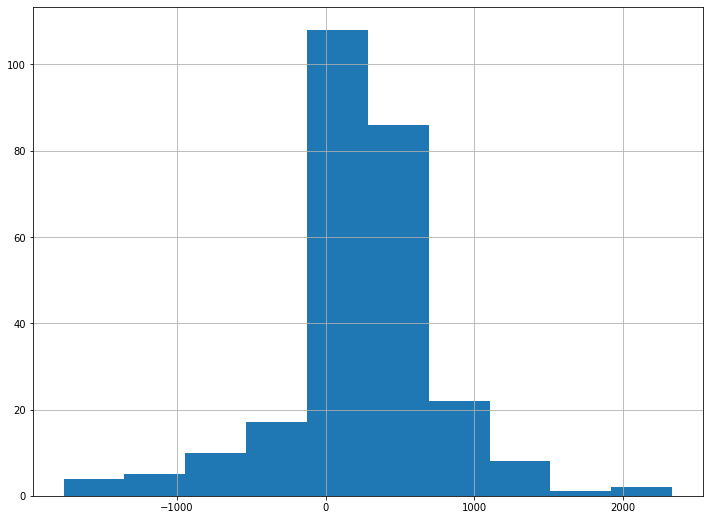

In [ ]:
data_covid['Kasus Aktif Baru'].hist()

stats.ttest_1samp(data_covid['Kasus Aktif Baru'], 100)
# pvalue = 0.533, accept null hypothesis

stats.ttest_1samp(data_covid['Kasus Aktif Baru'], 100)
# pvalue = 0.002, reject null hypothesis

# one-tailed, less than 130
m = 130

results = stats.ttest_1samp(data_covid['Kasus Aktif Baru'], m)
alpha = 0.05
if (results[0] < 0) & (results[1]/2 < alpha):
  print("reject null hypothesis, mean is less than {}".format(m))
else:
  print ("Terima Hipotesis Kosong")

# one-tailed, greater than 80
m = 80

results = stats.ttest_1samp(data_covid['Kasus Aktif Baru'], m)
alpha = 0.05

if (results[0] > 0) & (results[1]/2 < alpha):
  print("reject null hypothesis, mean is greater than {}".format(m))
else:
  print ("accept null hypothesis")

data_covid2= data_covid.mean()
print(data_covid2)

## **Koefisien Korelasi**


In [ ]:
corr, _ = pearsonr(X, Y)
print('Nilai Korelasi Pearsons : %.3f' % corr)

# Jika  > 0,7 berarti Linear

Nilai Korelasi Pearsons : 0.857


## **Regresi Linear**

### Menampilkan Grafik

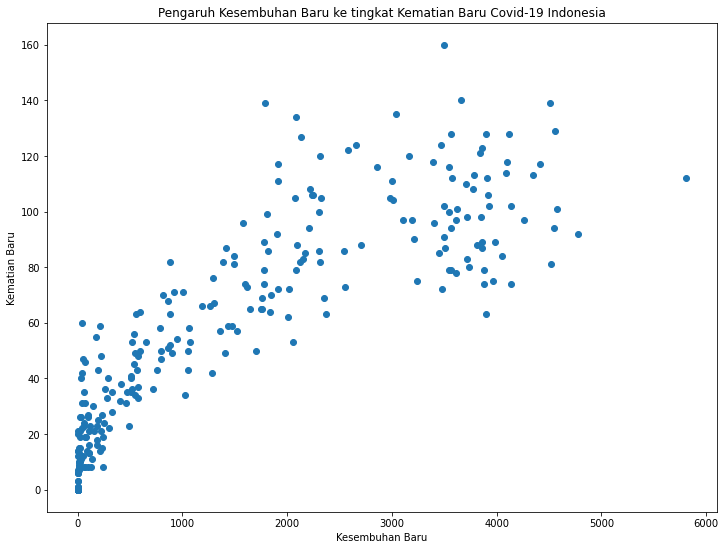

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 9.0)

plt.scatter(X, Y)
plt.xlabel('Kesembuhan Baru')
plt.ylabel('Kematian Baru')
plt.title('Pengaruh Kesembuhan Baru ke tingkat Kematian Baru Covid-19 Indonesia')

plt.show()

### Membuat Model Persamaan Nilai Gradient dan Intercept

In [ ]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = 0
den = 0
for i in range(len(X)):
  num += (X[i] - X_mean)*(Y[i] - Y_mean)
  den += (X[i] - X_mean)**2

m = num/den
c = Y_mean - m * X_mean

print("Gradient = ",m, "\nIntercept = ",c)

Gradient =  0.02227883738421622 
Intercept =  24.871320811897625


### Membuat Garis/Plot Prediksi

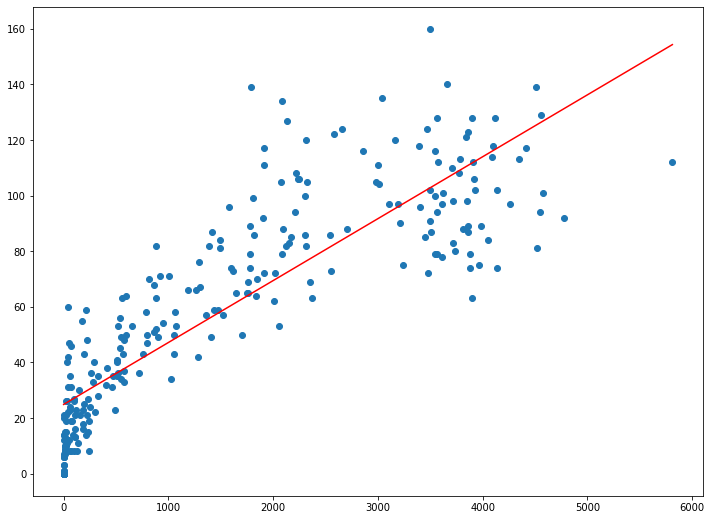

In [ ]:
Y_pred = m * X + c

plt.scatter(X, Y) # Sama kayak yang Menampilkan Dataset
#plt.scatter(X, Y_pred, color='red')
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()